data load
data EDA -- Should serve some purpose
data pre-processing -- stop words, stemming, normalisation, special char, 
feature engineering/extraction --
num of common words
pos
ner
intent detection 5w1h- who what where why when how
ques or not
similarity bwn abbreviation
sentiment


classifier

similarity score based on threshold
similarity score between vectors of the sentences -- use of pre-trained model
using sentence embeddings and concatenate and train a classifier
using sentence embeddings and concatenate  + concatenate other features and train a classifier
sentence embeddings -- glove, fasttext, bert, elmo
pass sentences to lsmt/seq models and concatenate the op and pass to a NN classifier with a sigmoid and train on whole data



Get counts of 0 and 1
POS of 1s and 0s
Clean data
Preprocess
Look at features to extract


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
#import seaborn as sns
import re
import spacy

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize,sent_tokenize
from string import punctuation

nltk.download('punkt')
nltk.download('wordnet')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Input, Model
from keras.layers import Dense, Flatten, LSTM, concatenate, Bidirectional, Dropout, Activation, Embedding
from keras import layers
from nltk.stem import WordNetLemmatizer
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package stopwords to C:\Users\Mohammad
[nltk_data]     Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Mohammad
[nltk_data]     Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Mohammad
[nltk_data]     Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,pid,sentence1,sentence2,label
0,4665,do you accept broadband bills,Broadband bill,1
1,26465,I am getting better fare for this flight,Check flight rate,0
2,57679,Flight from delhi to srinagar,check price for flight from mumbai to pune,1
3,22043,Availability of food,food available for guest,1
4,6522,This is my ID only,Can't find order ID.,0


<AxesSubplot:>

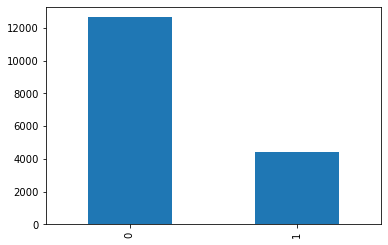

In [4]:
train['label'].value_counts().plot(kind = 'bar')

In [5]:
nlp = spacy.load("en_core_web_sm")
sent_1 = []
sent_2 = []
pos_tag = ['PROPN', 'ADJ', 'NOUN', 'VERB']
for text in train['sentence1']:
    
    x = []
    s = nlp(text.lower())
    for token in s:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        # 4
        if(token.pos_ in pos_tag):
            x.append(token.text)
             
    sent_1.append(x)
    
for text in train['sentence2']:
    #print(type(text))
    x = []
    s = nlp(text.lower())
    for token in s:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        # 4
        if(token.pos_ in pos_tag):
            x.append(token.text)
    sent_2.append(x)
#print(sent_2)

print(sent_1[:5])



[['accept', 'broadband', 'bills'], ['getting', 'better', 'fare', 'flight'], ['flight', 'delhi', 'srinagar'], ['availability', 'food'], ['d']]


In [6]:
print(sent_2[:5])

[['broadband', 'bill'], ['check', 'flight', 'rate'], ['check', 'price', 'flight', 'mumbai', 'pune'], ['food', 'available', 'guest'], ['find', 'order', 'd']]


In [7]:
temp_dic = {'sent_1' : sent_1, 'sent_2' : sent_2}
curr_x = pd.DataFrame(temp_dic)
curr_x.head()

curr_x['sent_1'] = curr_x['sent_1'].str.join(' ')
curr_x['sent_2'] = curr_x['sent_2'].str.join(' ')

In [8]:


X_train,X_test,y_train,y_test = train_test_split(curr_x, train.label,test_size=0.2, random_state = 0)

print(X_train.head())
print(y_train.head())

                                               sent_1                   sent_2
13035                             facing issues login              login error
14055  advantage kg maxima cylinder smaller cylinders                kg maxima
8883                                    cash delivery  cash delivery available
3780                         want offers uber booking                 buy uber
13352                                     pin working              pin getting
13035    1
14055    0
8883     1
3780     0
13352    1
Name: label, dtype: int64


In [9]:
curr_y = train['label']
max_len = 7
tok_1 = Tokenizer()
tok_1.fit_on_texts(X_train['sent_1'])
tok_1.fit_on_texts(X_test['sent_1'])
seq_1_train = tok_1.texts_to_sequences(X_train['sent_1'])
seq_1_test = tok_1.texts_to_sequences(X_test['sent_1'])
tok_2 = Tokenizer()
tok_2.fit_on_texts(X_train['sent_2'])
seq_2_train = tok_2.texts_to_sequences(X_train['sent_2'])
tok_2.fit_on_texts(X_test['sent_1'])
seq_2_test = tok_2.texts_to_sequences(X_test['sent_2'])

pad_seq_1_train = pad_sequences(seq_1_train, padding = 'post', maxlen = max_len)
pad_seq_2_train = pad_sequences(seq_2_train, padding = 'post', maxlen = max_len)

pad_seq_1_test = pad_sequences(seq_1_test, padding = 'post', maxlen = max_len)
pad_seq_2_test = pad_sequences(seq_2_test, padding = 'post', maxlen = max_len)

In [10]:


embed = curr_x['sent_1'] + ' ' + curr_x['sent_2']
embed.head()

tok_emb = Tokenizer()
tok_emb.fit_on_texts(embed)

print(tok_emb.word_index)



#word_index = list({**tok_1.word_index, tok_2.word_index}.values())

{'want': 1, 'flight': 2, 'reminder': 3, 'tickets': 4, 'book': 5, 'cashback': 6, 'need': 7, 'flights': 8, 'd': 9, 'booking': 10, 'know': 11, 'help': 12, 'ticket': 13, 'check': 14, 'order': 15, 'cash': 16, 'send': 17, 'set': 18, 'offers': 19, 'total': 20, 'secure': 21, 'bill': 22, 'mumbai': 23, 'train': 24, 'offer': 25, 'change': 26, 'pay': 27, 'account': 28, 'tell': 29, 'received': 30, 'number': 31, 'features': 32, 'premium': 33, 'time': 34, 'find': 35, 'status': 36, 'remind': 37, 'cancel': 38, 'fare': 39, 'buy': 40, 'like': 41, 'delhi': 42, 'test': 43, 'price': 44, 'exercise': 45, 'password': 46, 'survival': 47, 'benefits': 48, 'discount': 49, 'new': 50, 'key': 51, 'available': 52, 'receive': 53, 'report': 54, 'code': 55, 'reminders': 56, 'schedule': 57, 'lpg': 58, 'payment': 59, 'refund': 60, 'water': 61, 'jog': 62, 'stop': 63, 'pin': 64, 'drink': 65, 'wake': 66, 'getting': 67, 'login': 68, 'got': 69, 'bus': 70, 'correct': 71, 'bank': 72, 'home': 73, 'right': 74, 'alert': 75, 'pune': 

In [11]:
embeddings_index = {}
f = open('glove.6B.50d.txt', encoding = 'utf-8')
for line in f:
    values = line.split(' ')
    word = values[0] ## The first entry is the word
    coefs = np.asarray(values[1:], dtype='float32') ## These are the vecotrs representing the embedding for the word
    embeddings_index[word] = coefs
f.close()
print('GloVe data loaded')


max_num_1 = len(tok_1.word_index) + 1
word_index_1 = tok_1.word_index
EMBEDDING_DIM = embeddings_index.get('a').shape[0]
num_words_1 = min(max_num_1, len(word_index_1)) + 1
embedding_matrix_1 = np.zeros((num_words_1, EMBEDDING_DIM))

for word, i in word_index_1.items():
    if i > max_num_1:
        continue
    embedding_vector = embeddings_index.get(word) ## This references the loaded embeddings dictionary
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix_1[i] = embedding_vector


max_num_2 = len(tok_2.word_index) + 1
word_index_2 = tok_2.word_index
num_words_2 = min(max_num_2, len(word_index_2)) + 1
embedding_matrix_2 = np.zeros((num_words_2, EMBEDDING_DIM))

for word, i in word_index_2.items():
    if i > max_num_2:
        continue
    embedding_vector = embeddings_index.get(word) ## This references the loaded embeddings dictionary
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix_2[i] = embedding_vector

        

GloVe data loaded


In [12]:
#print(embedding_matrix_1[1])
#print(embedding_matrix_2[9])
#pad_seq_1_train.shape
pad_seq_2_train.shape

#y_train = to_categorical(y_train, 2)
#y_test = to_categorical(y_test, 2)



(13635, 7)

In [13]:


input_1  = Input(shape=(7,))
input_2 = Input(shape = (7,))
embedding_1 = Embedding(num_words_1, EMBEDDING_DIM, input_length=max_len,
                      weights=[embedding_matrix_1], trainable=False)(input_1)

embedding_2 = Embedding(num_words_2, EMBEDDING_DIM, input_length=max_len,
                      weights=[embedding_matrix_2], trainable=False)(input_2)




hidden_1 = LSTM(64,  activation="softmax", return_sequences = True)(embedding_1)
hidden_2 = LSTM(64, activation="softmax", return_sequences = True)(embedding_2)

flatten_1 = Flatten()(hidden_1)
flatten_2 = Flatten()(hidden_2)

concat = concatenate([flatten_1, flatten_2])

hidden = Dense(1, activation = 'sigmoid')(concat)
model = Model(inputs=[input_1, input_2], outputs=hidden)

In [14]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 7)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 7)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 7, 50)        119500      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 7, 50)        122750      input_2[0][0]                    
______________________________________________________________________________________________

In [15]:
model.fit(x = [pad_seq_1_train, pad_seq_2_train], y = y_train, batch_size=20,
                    epochs=20, verbose = 1, validation_split = 0.02, 
          validation_data = ([pad_seq_1_test, pad_seq_2_test], y_test))

Epoch 1/20
669/669 [==============================] - 3s 4ms/step - loss: 0.5776 - accuracy: 0.7379 - val_loss: 0.5122 - val_accuracy: 0.7985
Epoch 2/20
669/669 [==============================] - 2s 3ms/step - loss: 0.5570 - accuracy: 0.7388 - val_loss: 0.5095 - val_accuracy: 0.7985
Epoch 3/20
669/669 [==============================] - 3s 4ms/step - loss: 0.5496 - accuracy: 0.7388 - val_loss: 0.5050 - val_accuracy: 0.7985
Epoch 4/20
669/669 [==============================] - 3s 4ms/step - loss: 0.5432 - accuracy: 0.7388 - val_loss: 0.5010 - val_accuracy: 0.7985
Epoch 5/20
669/669 [==============================] - 3s 4ms/step - loss: 0.5376 - accuracy: 0.7388 - val_loss: 0.4984 - val_accuracy: 0.7985
Epoch 6/20
669/669 [==============================] - 3s 4ms/step - loss: 0.5325 - accuracy: 0.7389 - val_loss: 0.4911 - val_accuracy: 0.7985
Epoch 7/20
669/669 [==============================] - 3s 4ms/step - loss: 0.5271 - accuracy: 0.7396 - val_loss: 0.4895 - val_accuracy: 0.7985
Epoch 

In [16]:
result = model.evaluate([pad_seq_1_test, pad_seq_2_test], y_test, batch_size = 128, verbose = 1)

27/27 [==============================] - 0s 3ms/step - loss: 0.5271 - accuracy: 0.7474


In [17]:
df_test = pd.read_csv('test.csv')



test_1 = []
test_2 = []
pos_tag = ['PROPN', 'ADJ', 'NOUN', 'VERB']
for text in df_test['sentence1']:
    
    x = []
    s = nlp(text.lower())
    for token in s:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        # 4
        if(token.pos_ in pos_tag):
            x.append(token.text)
             
    test_1.append(x)
    
for text in df_test['sentence2']:
    #print(type(text))
    x = []
    s = nlp(text.lower())
    for token in s:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        # 4
        if(token.pos_ in pos_tag):
            x.append(token.text)
    test_2.append(x)
#print(sent_2)


test_dic = {'sent_1' : test_1, 'sent_2' : test_2}
test_x = pd.DataFrame(test_dic)
test_x.head()

test_x['sent_1'] = test_x['sent_1'].str.join(' ')
test_x['sent_2'] = test_x['sent_2'].str.join(' ')



In [18]:
tok_3 = Tokenizer()
tok_3.fit_on_texts(test_x['sent_1'])
seq_3_train = tok_3.texts_to_sequences(test_x['sent_1'])

tok_4 = Tokenizer()
tok_4.fit_on_texts(test_x['sent_2'])
seq_4_train = tok_4.texts_to_sequences(test_x['sent_2'])


test_pad_seq_1 = pad_sequences(seq_3_train, padding = 'post', maxlen = max_len)
test_pad_seq_2 = pad_sequences(seq_4_train, padding = 'post', maxlen = max_len)



In [19]:
prediction = model.predict([test_pad_seq_1, test_pad_seq_2])

In [20]:
print(prediction)

pred = prediction.flatten().tolist()

[[0.29060045]
 [0.0847874 ]
 [0.10919279]
 ...
 [0.05230966]
 [0.07820967]
 [0.06466958]]


In [21]:
#print(pred)

for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i] = 1
    else:
        pred[i] = 0

print(pred)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [24]:
pid = df_test.pid

df_dict = {'pid' : pid, 'label' : pred}

df_sub = pd.DataFrame(df_dict)

df_sub.to_csv('Submission.csv')